In [1]:
import pandas as pd
df = pd.read_csv('heart24.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


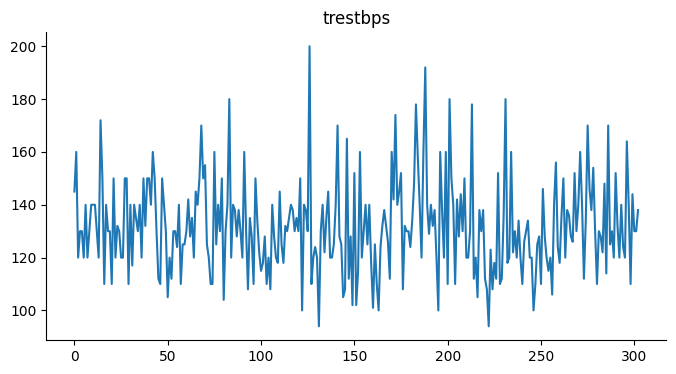

In [5]:
from matplotlib import pyplot as plt
df['trestbps'].plot(kind='line', figsize=(8, 4), title='trestbps')
plt.gca().spines[['top', 'right']].set_visible(False)

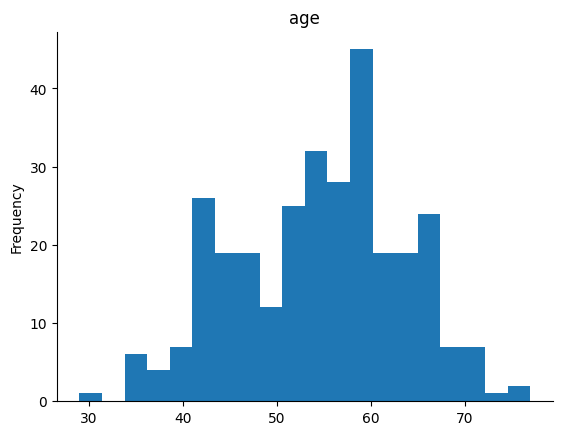

In [6]:
from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

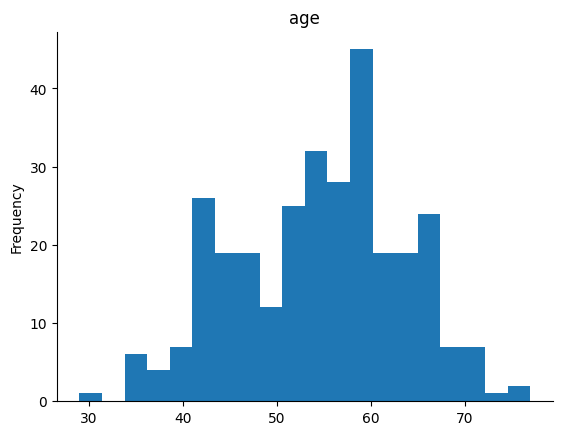

In [7]:
from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
import pandas as pd
data = pd.read_csv('heart24.csv')
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
from sklearn.feature_selection import SelectKBest, f_classif

# تحديد الميزات والهدف
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
          'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']

# استخدام SelectKBest لاختيار أفضل 10 ميزات
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# استخراج أسماء الميزات المختارة
selected_features = X.columns[selector.get_support()]
print("أفضل الميزات المختارة:")
print(selected_features)


أفضل الميزات المختارة:
Index(['age', 'sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')


### EDA

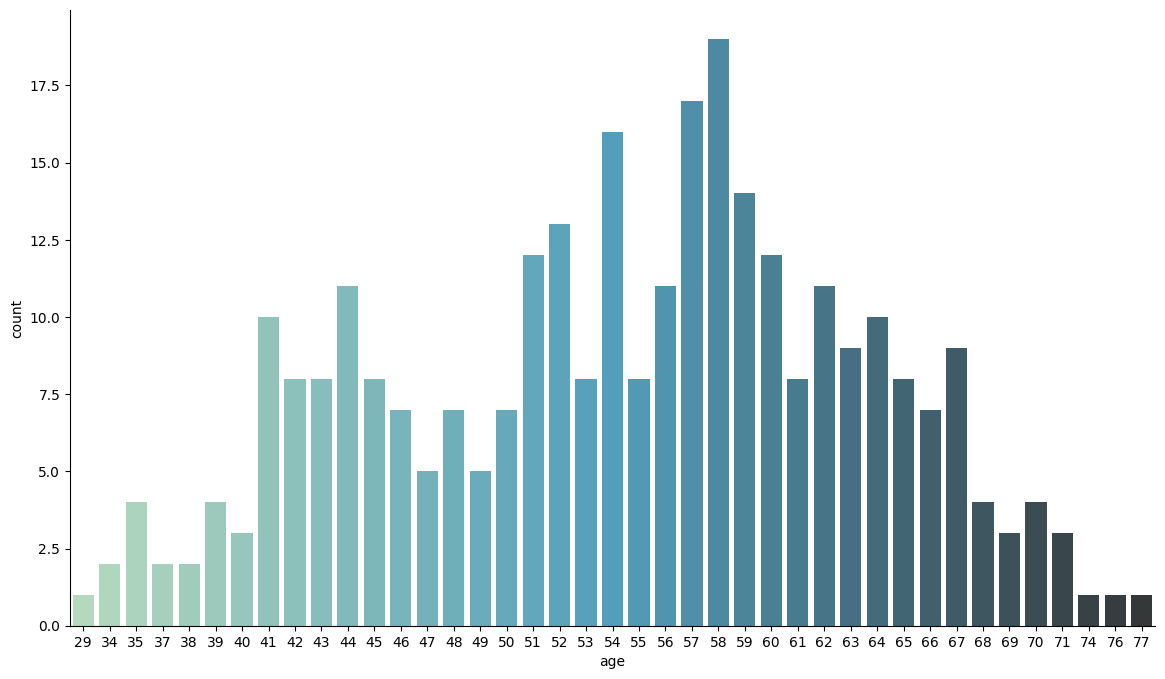

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x="age", data=df, palette="GnBu_d")
sns.despine()
plt.savefig('Distruption class', dpi=300, transparent=True)
plt.show()

### Random Forest Model Evaluation

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Creating a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Predicting using the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Model Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61


Confusion Matrix:
[[27  2]
 [ 5 27]]


In [13]:
# بيانات المريض الجديد باستخدام الميزات المختارة فقط
new_patient = [[57, 1, 2, 1, 140, 0, 1.0, 2, 0, 3]]  # تأكد أن القيم تتوافق مع الميزات المختارة

# التنبؤ بالحالة باستخدام النموذج
prediction = model.predict(new_patient)

# عرض النتيجة
if prediction[0] == 1:
    print("The patient is likely to have heart disease.")
else:
    print("The patient is unlikely to have heart disease.")


The patient is likely to have heart disease.


c:\Users\eg\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### SVM Model Evaluation

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# إنشاء نموذج SVM
svm_model = SVC(kernel='linear', random_state=42)  # يمكنك تغيير 'linear' إلى 'rbf' أو غيره

# تدريب النموذج
svm_model.fit(X_train, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred = svm_model.predict(X_test)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Confusion Matrix:
[[26  3]
 [ 3 29]]


In [18]:

import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# تحميل البيانات (استبدل 'your_dataset.csv' بمسار ملف البيانات الخاص بك)
# df = pd.read_csv('heart2024.csv')

# معالجة البيانات (مثال على التعامل مع القيم المفقودة أو الترميز)
# في حال كانت هناك قيم مفقودة أو قمت بترميز بعض الأعمدة، يمكنك القيام بذلك هنا

# تقسيم البيانات إلى X (الميزات) و y (الهدف)
X = df.drop('target', axis=1)  # افترض أن عمود الهدف يسمى 'target'
y = df['target']

# توحيد البيانات (Normalization) باستخدام StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# إنشاء نموذج
model = xgb.XGBClassifier(eval_metric='logloss')

# تدريب النموذج
model.fit(X_train_scaled, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred = model.predict(X_test_scaled)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61


Confusion Matrix:
[[24  5]
 [ 8 24]]


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# تحميل البيانات
#df = pd.read_csv('heart2024.csv')

# تقسيم البيانات إلى X (الميزات) و y (الهدف)
X = df.drop('target', axis=1)  # افترض أن عمود الهدف يسمى 'target'
y = df['target']


# توحيد البيانات
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تدريب نموذج LightGBM
train_data = lgb.Dataset(X_train_scaled, label=y_train)
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
model = lgb.train(params, train_data, 100)

# التنبؤ وتقييم النموذج
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred >= 0.5).astype(int)  # تحويل القيم إلى 0 أو 1



[LightGBM] [Info] Number of positive: 107, number of negative: 135
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.442149 -> initscore=-0.232446
[LightGBM] [Info] Start training from score -0.232446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [28]:
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'\n\n\nAccuracy: {accuracy * 100:.2f}%')

print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))




Accuracy: 86.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


Confusion Matrix:
[[27  2]
 [ 6 26]]
